# 설문조사를 활용한 머신러닝
### - 2018 서울형 통합교통서비스 인식 설문조사 -

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name) # 한글처리

import warnings 
warnings.filterwarnings(action="ignore") #waring을 무시하도록 처리

In [175]:
df = pd.read_csv('../Project3 Data/ANSWER.csv')
df
# 엑셀에서 어느정도 전처리를 해서 가져옴

,NO,지역,성별,나이,자동차,대중교통,택시,비용,경험,인지,한정도입,완전도입,가구원수,월소득
0,1,d,F,3,0,4,1,2.0,1,2,1,1,1,0
1,3,d,F,2,0,3,2,1.0,1,1,1,1,3,0
2,7,c,M,5,1,4,1,2.0,0,3,1,1,4,0
3,8,d,M,4,1,3,1,0.0,0,2,0,1,2,1
4,9,d,M,5,1,0,0,NaN,0,3,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1937,c,M,1,0,2,1,0.0,1,2,1,1,4,1
996,1938,e,F,1,0,4,1,2.0,0,1,1,1,4,1
997,1947,c,M,1,1,3,2,2.0,1,3,1,1,3,2
998,1982,c,M,1,0,2,1,0.0,0,2,1,1,4,2


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NO      1000 non-null   int64  
 1   지역      1000 non-null   object 
 2   성별      1000 non-null   object 
 3   나이      1000 non-null   int64  
 4   자동차     1000 non-null   int64  
 5   대중교통    1000 non-null   int64  
 6   택시      1000 non-null   int64  
 7   비용      986 non-null    float64
 8   경험      1000 non-null   int64  
 9   인지      1000 non-null   int64  
 10  한정도입    1000 non-null   int64  
 11  완전도입    1000 non-null   int64  
 12  가구원수    1000 non-null   int64  
 13  월소득     1000 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 109.5+ KB


## 원핫인코딩

In [177]:
#지역과 성별을 원핫인코딩 적용
df2 = pd.get_dummies(df, columns=['지역','성별'])
df2

,NO,나이,자동차,대중교통,택시,비용,경험,인지,한정도입,완전도입,가구원수,월소득,지역_a,지역_b,지역_c,지역_d,지역_e,성별_F,성별_M
0,1,3,0,4,1,2.0,1,2,1,1,1,0,0,0,0,1,0,1,0
1,3,2,0,3,2,1.0,1,1,1,1,3,0,0,0,0,1,0,1,0
2,7,5,1,4,1,2.0,0,3,1,1,4,0,0,0,1,0,0,0,1
3,8,4,1,3,1,0.0,0,2,0,1,2,1,0,0,0,1,0,0,1
4,9,5,1,0,0,NaN,0,3,0,0,4,2,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1937,1,0,2,1,0.0,1,2,1,1,4,1,0,0,1,0,0,0,1
996,1938,1,0,4,1,2.0,0,1,1,1,4,1,0,0,0,0,1,1,0
997,1947,1,1,3,2,2.0,1,3,1,1,3,2,0,0,1,0,0,0,1
998,1982,1,0,2,1,0.0,0,2,1,1,4,2,0,0,1,0,0,0,1


In [178]:
#응답자 고유번호와 지역은 스트링 처리 후 응답자 번호를 인덱스로 변경
df2['NO'] = df2['NO'].astype(str)
df2.set_index('NO')

,나이,자동차,대중교통,택시,비용,경험,인지,한정도입,완전도입,가구원수,월소득,지역_a,지역_b,지역_c,지역_d,지역_e,성별_F,성별_M
NO,,,,,,,,,,,,,,,,,,
1,3,0,4,1,2.0,1,2,1,1,1,0,0,0,0,1,0,1,0
3,2,0,3,2,1.0,1,1,1,1,3,0,0,0,0,1,0,1,0
7,5,1,4,1,2.0,0,3,1,1,4,0,0,0,1,0,0,0,1
8,4,1,3,1,0.0,0,2,0,1,2,1,0,0,0,1,0,0,1
9,5,1,0,0,NaN,0,3,0,0,4,2,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,1,0,2,1,0.0,1,2,1,1,4,1,0,0,1,0,0,0,1
1938,1,0,4,1,2.0,0,1,1,1,4,1,0,0,0,0,1,1,0
1947,1,1,3,2,2.0,1,3,1,1,3,2,0,0,1,0,0,0,1


In [179]:
df2.describe()

,나이,자동차,대중교통,택시,비용,경험,인지,한정도입,완전도입,가구원수,월소득,지역_a,지역_b,지역_c,지역_d,지역_e,성별_F,성별_M
count,1000.000000,1000.000000,1000.000000,1000.00000,986.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.351000,0.518000,3.126000,1.15100,0.936105,0.280000,1.832000,0.68300,0.603000,3.222000,1.154000,0.053000,0.308000,0.215000,0.305000,0.119000,0.502000,0.498000
std,1.248743,0.499926,0.988484,0.84789,0.746549,0.449224,0.851176,0.46554,0.489521,1.208377,0.782877,0.224146,0.461898,0.411028,0.460638,0.323951,0.500246,0.500246
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.00000,0.000000,0.000000,1.000000,0.00000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,3.000000,1.00000,1.000000,0.000000,2.000000,1.00000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,1.000000,4.000000,2.00000,1.000000,1.000000,2.000000,1.00000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5.000000,1.000000,4.000000,4.00000,2.000000,1.000000,5.000000,1.00000,1.000000,7.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
df2.corr()

,나이,자동차,대중교통,택시,비용,경험,인지,한정도입,완전도입,가구원수,월소득,지역_a,지역_b,지역_c,지역_d,지역_e,성별_F,성별_M
나이,1.000000,0.314568,-0.278338,-0.123850,-0.076694,-0.111134,0.181730,-0.106297,0.028406,0.024597,0.115648,0.012149,0.013696,-0.012608,-0.010537,0.003046,0.012496,-0.012496
자동차,0.314568,1.000000,-0.365155,-0.012322,-0.055526,0.031022,0.164724,-0.072231,0.055817,0.091142,0.271690,0.049543,0.001977,0.017683,-0.047771,0.008394,-0.280328,0.280328
대중교통,-0.278338,-0.365155,1.000000,0.152843,0.415531,-0.018665,-0.085460,0.236975,0.082793,0.023488,-0.030273,-0.084385,-0.006156,0.024416,0.010047,0.021901,0.066293,-0.066293
택시,-0.123850,-0.012322,0.152843,1.000000,0.222343,0.217392,0.062925,0.103636,0.127692,-0.040567,0.120257,-0.000016,0.047264,0.001537,-0.051399,0.003757,-0.025493,0.025493
비용,-0.076694,-0.055526,0.415531,0.222343,1.000000,0.098801,0.112581,0.292880,0.250693,-0.019852,0.034604,-0.022363,-0.016615,0.015594,-0.023770,0.052586,-0.019694,0.019694
경험,-0.111134,0.031022,-0.018665,0.217392,0.098801,1.000000,0.185975,0.094581,0.164600,0.038430,0.008197,0.031414,-0.030103,0.026022,-0.011610,0.004677,0.019777,-0.019777
인지,0.181730,0.164724,-0.085460,0.062925,0.112581,0.185975,1.000000,0.077664,0.332261,0.067440,0.016332,0.041470,0.017171,-0.022546,-0.035130,0.025383,-0.057982,0.057982
한정도입,-0.106297,-0.072231,0.236975,0.103636,0.292880,0.094581,0.077664,1.000000,0.448692,0.004224,-0.082896,-0.030687,-0.020315,-0.025345,0.026537,0.044623,0.056453,-0.056453
완전도입,0.028406,0.055817,0.082793,0.127692,0.250693,0.164600,0.332261,0.448692,1.000000,0.040840,-0.020535,0.018620,-0.012059,-0.008184,-0.039575,0.070969,0.005289,-0.005289
가구원수,0.024597,0.091142,0.023488,-0.040567,-0.019852,0.038430,0.067440,0.004224,0.040840,1.000000,0.368030,0.019344,0.002913,0.054960,-0.098387,0.052631,0.009200,-0.009200


In [181]:
df2['비용'].fillna(1, inplace=True) #일부 결측값을 최빈 응답인 1로 대체
df2

,NO,나이,자동차,대중교통,택시,비용,경험,인지,한정도입,완전도입,가구원수,월소득,지역_a,지역_b,지역_c,지역_d,지역_e,성별_F,성별_M
0,1,3,0,4,1,2.0,1,2,1,1,1,0,0,0,0,1,0,1,0
1,3,2,0,3,2,1.0,1,1,1,1,3,0,0,0,0,1,0,1,0
2,7,5,1,4,1,2.0,0,3,1,1,4,0,0,0,1,0,0,0,1
3,8,4,1,3,1,0.0,0,2,0,1,2,1,0,0,0,1,0,0,1
4,9,5,1,0,0,1.0,0,3,0,0,4,2,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1937,1,0,2,1,0.0,1,2,1,1,4,1,0,0,1,0,0,0,1
996,1938,1,0,4,1,2.0,0,1,1,1,4,1,0,0,0,0,1,1,0
997,1947,1,1,3,2,2.0,1,3,1,1,3,2,0,0,1,0,0,0,1
998,1982,1,0,2,1,0.0,0,2,1,1,4,2,0,0,1,0,0,0,1


In [182]:
df3 = df2[['자동차','대중교통','택시','비용','경험','인지','가구원수','지역_e', '한정도입', '완전도입']]
df3.corr()

,자동차,대중교통,택시,비용,경험,인지,가구원수,지역_e,한정도입,완전도입
자동차,1.000000,-0.365155,-0.012322,-0.055007,0.031022,0.164724,0.091142,0.008394,-0.072231,0.055817
대중교통,-0.365155,1.000000,0.152843,0.381028,-0.018665,-0.085460,0.023488,0.021901,0.236975,0.082793
택시,-0.012322,0.152843,1.000000,0.218989,0.217392,0.062925,-0.040567,0.003757,0.103636,0.127692
비용,-0.055007,0.381028,0.218989,1.000000,0.098108,0.111705,-0.020129,0.052089,0.290127,0.248220
경험,0.031022,-0.018665,0.217392,0.098108,1.000000,0.185975,0.038430,0.004677,0.094581,0.164600
인지,0.164724,-0.085460,0.062925,0.111705,0.185975,1.000000,0.067440,0.025383,0.077664,0.332261
가구원수,0.091142,0.023488,-0.040567,-0.020129,0.038430,0.067440,1.000000,0.052631,0.004224,0.040840
지역_e,0.008394,0.021901,0.003757,0.052089,0.004677,0.025383,0.052631,1.000000,0.044623,0.070969
한정도입,-0.072231,0.236975,0.103636,0.290127,0.094581,0.077664,0.004224,0.044623,1.000000,0.448692
완전도입,0.055817,0.082793,0.127692,0.248220,0.164600,0.332261,0.040840,0.070969,0.448692,1.000000


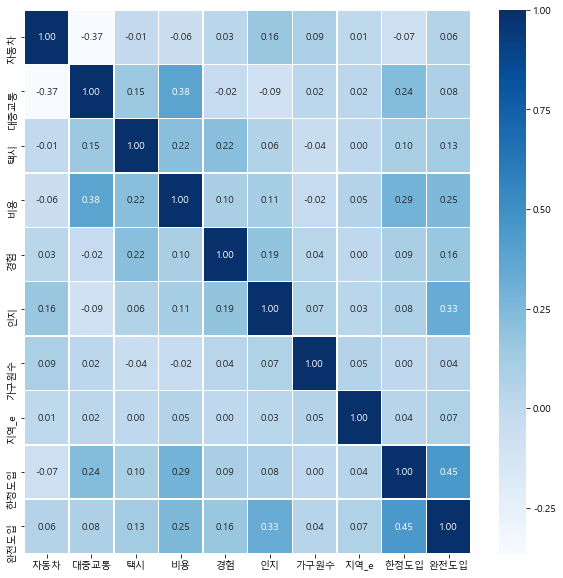

In [183]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df3.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [184]:
features = df2[['자동차','대중교통','택시','비용','경험','인지','가구원수','지역_e']]
features

,자동차,대중교통,택시,비용,경험,인지,가구원수,지역_e
0,0,4,1,2.0,1,2,1,0
1,0,3,2,1.0,1,1,3,0
2,1,4,1,2.0,0,3,4,0
3,1,3,1,0.0,0,2,2,0
4,1,0,0,1.0,0,3,4,0
...,...,...,...,...,...,...,...,...
995,0,2,1,0.0,1,2,4,0
996,0,4,1,2.0,0,1,4,1
997,1,3,2,2.0,1,3,3,0
998,0,2,1,0.0,0,2,4,0


## <정책의 '완전도입'에 의미가 있을 사람을 판별하기>
## - 의사결정 트리

In [185]:
# 공부할 데이터/검증용 데이터 분리
# 머신러닝용 라이브러리: sklearn, 사이킷 런
from sklearn.model_selection import train_test_split

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(features, # 데이터 프레임의 속성들
                 df2[['완전도입']], # 맞추어야 할 정답
                 test_size = 0.2, # 테스트데이터 20%지정, 훈련데이터 80%할당
                 stratify = df2[['완전도입']], # 쏠려서 분배되는것을 방지
                 random_state = 28 #seed값
                )

In [187]:
len(X_train)

800

In [188]:
print(X_train.head())
print(Y_train.head())
print(X_test.head())
print(Y_test.head())

     자동차  대중교통  택시   비용  경험  인지  가구원수  지역_e
669    1     2   1  0.0   0   2     4     0
498    0     4   2  1.0   0   1     2     0
780    0     3   1  0.0   0   2     2     0
78     1     3   3  1.0   0   2     5     1
104    1     2   0  0.0   0   1     3     0
     완전도입
669     0
498     0
780     1
78      1
104     0
     자동차  대중교통  택시   비용  경험  인지  가구원수  지역_e
350    1     2   2  2.0   1   3     3     0
959    0     4   2  1.0   1   2     3     0
737    0     2   0  0.0   0   1     2     0
210    1     4   1  1.0   0   3     3     0
844    0     3   1  1.0   0   1     3     0
     완전도입
350     1
959     0
737     0
210     1
844     0


### 그리드서치와 K-Fold 교차검증 적용

In [189]:
# 사이킷런의 의사 결정 나무 모델을 가져오기
from sklearn.tree import DecisionTreeClassifier
# 정확도 측정 모델 가져오기
from sklearn.metrics import accuracy_score
# KFold와 그리드서치 모델 가져오기
from sklearn.model_selection import KFold, GridSearchCV

In [190]:
#학습기 객체 생성
DTC = DecisionTreeClassifier()

In [191]:
param_grid = {'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
              'min_samples_split': [2, 3, 4, 5], #적을수록 과적합 위험
              'splitter': ['best', 'random']}

In [192]:
gsDTC = GridSearchCV(DTC, param_grid, cv=5, refit=True, return_train_score=True)

In [193]:
#트레이닝 데이터로 학습 시키기
gsDTC.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12], 'min_samples_split': [2, 3, 4, 5], 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [194]:
#train데이터를 가지고 공부한 점수
gsDTC.score(X_train, Y_train)

0.70875

In [195]:
gsDTC.best_params_

{'max_depth': 5, 'min_samples_split': 4, 'splitter': 'random'}

In [196]:
Y1_pred = gsDTC.predict(X_test)

In [197]:
gsDTC.best_score_

0.67375

In [198]:
#테스트데이터를 푼 답안과 해답을 비교해서 정확도를 구해보자.
accuracy_score(Y_test, Y1_pred)

0.67

## - 로지스틱 회귀(+ 그리드서치, K-fold 교차검증)

In [199]:
from sklearn.linear_model import LogisticRegression

In [200]:
#학습기 객체 생성
LR = LogisticRegression()

In [201]:
param_grid = [{'C': np.linspace(0.1, 1, 10), 'penalty': ['l1', 'l2']}]

In [202]:
gsLR = GridSearchCV(LR, param_grid, cv=5, refit=True, return_train_score=True)

In [203]:
gsLR.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [204]:
gsLR.score(X_train, Y_train)

0.6875

In [205]:
gsLR.best_params_

{'C': 0.4, 'penalty': 'l2'}

In [206]:
Y2_pred = gsLR.predict(X_test)

In [207]:
gsLR.best_score_

0.68375

In [208]:
accuracy_score(Y_test, Y2_pred)

0.79

## - SVM(+ 그리드서치, K-fold 교차검증)

In [220]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import classification_report

In [221]:
svc = SVC()

In [222]:
values = np.linspace(0.1, 1, 10)

In [223]:
param_grid = [
    {'kernel' : ['rbf'], 'C':values, 'gamma' : values},
    {'kernel' : ['linear'], 'C':values}
]

In [224]:
gsSVC = GridSearchCV(svc, param_grid, cv=5, refit=True, return_train_score=True)

In [225]:
gsSVC.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}, {'kernel': ['linear'], 'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [226]:
gsSVC.score(X_train, Y_train)

0.74

In [227]:
gsSVC.best_params_

{'C': 0.5, 'gamma': 0.30000000000000004, 'kernel': 'rbf'}

In [228]:
Y3_pred = gsSVC.predict(X_test)

In [229]:
gsSVC.best_score_

0.69625

In [230]:
accuracy_score(Y_test, Y3_pred)

0.72